 <a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>Data Analysis with Python</font></h1>

# House Sales in King County, USA
Note: This project was originally created by IBM for students enrolled in their online Coursera course <a href="https://www.coursera.org/learn/data-analysis-with-python/home/welcome">Data Analysis with Python</a>. I have adapted this project in small ways to demonstrate analysis with a few regression techniques. Original IBM author and contributers are listed at the bottom of this notebook.

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

<b>id</b> : A notation for a house

<b> date</b>: Date house was sold


<b>price</b>: Price is prediction target


<b>bedrooms</b>: Number of bedrooms


<b>bathrooms</b>: Number of bathrooms

<b>sqft_living</b>: Square footage of the home

<b>sqft_lot</b>: Square footage of the lot


<b>floors</b> :Total floors (levels) in house


<b>waterfront</b> :House which has a view to a waterfront


<b>view</b>: Has been viewed


<b>condition</b> :How good the condition is overall

<b>grade</b>: overall grade given to the housing unit, based on King County grading system


<b>sqft_above</b> : Square footage of house apart from basement


<b>sqft_basement</b>: Square footage of the basement

<b>yr_built</b> : Built Year


<b>yr_renovated</b> : Year when house was renovated

<b>zipcode</b>: Zip code


<b>lat</b>: Latitude coordinate

<b>long</b>: Longitude coordinate

<b>sqft_living15</b> : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area


<b>sqft_lot15</b> : LotSize area in 2015(implies-- some renovations)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

Let's get our dataset into a dataframe.

In [2]:
King_County='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(King_County)

Let's verify it translated correctly by looking at the first five rows of the dataset in the dataframe.

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now, let's explore the different datatypes we will be working with in the dataframe.

In [4]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Much of the data we will be working with is in int or float form, which makes numerical analysis easier.

Let's take a look at the basic statistics of each column to get an idea of what our overall column values are looking like based on mean, standard deviation, minimums and maximums of each column, and the percentiles at, above, and below the median.

In [5]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Wrangling

Let's drop some unneeded columns.

In [6]:
df.drop(['id','Unnamed: 0'], axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Check for NaN values.

In [7]:
for (col, col_data) in df.iteritems():
    print("NaN values in ", col, ": ", df[col].isnull().sum())

NaN values in  date :  0
NaN values in  price :  0
NaN values in  bedrooms :  13
NaN values in  bathrooms :  10
NaN values in  sqft_living :  0
NaN values in  sqft_lot :  0
NaN values in  floors :  0
NaN values in  waterfront :  0
NaN values in  view :  0
NaN values in  condition :  0
NaN values in  grade :  0
NaN values in  sqft_above :  0
NaN values in  sqft_basement :  0
NaN values in  yr_built :  0
NaN values in  yr_renovated :  0
NaN values in  zipcode :  0
NaN values in  lat :  0
NaN values in  long :  0
NaN values in  sqft_living15 :  0
NaN values in  sqft_lot15 :  0


Replace NaN values with the mean for the column.

In [8]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [9]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

Double check to make sure all NaN values were replaced.

In [10]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Exploratory Data Analysis

Let's look at the number of floors over all homes in the dataset.


In [11]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Let's look at the relationship between <code>'price'</code> and whether or not the home is on a waterfront.

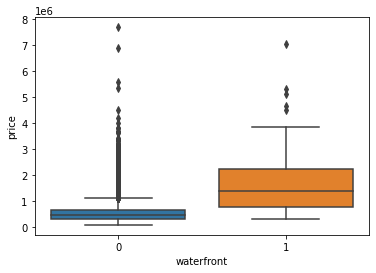

In [12]:
sns.boxplot(x="waterfront", y="price", data=df)

Let's also explore the relationship between <code>'sqft_above'</code> and <code>'price'</code>.

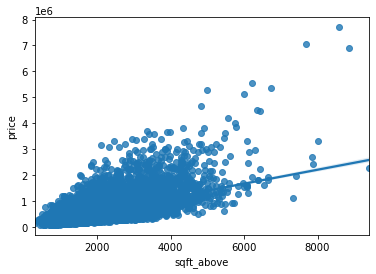

In [13]:
sns.regplot(x="sqft_above", y="price", data=df)

Let's look at the correlations of each variable with price to see which are more strongly correlated.

In [14]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Model Development

Let's fit a linear regression model using the <code>'long'</code> feature and <code>'price'</code>, and then calculate the R-squared.

In [15]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149029567

The feature <code>'long'</code> does not look like a good predictor of price. The longitude coordinate of a home typically does not have a large effect on the price of a home, so this makes sense. Let's explore a feature that we know affects a home's price significantly.

Let's fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code>, and then calculate the R-squared.

In [16]:
X1=df[['sqft_living']]
lm1=LinearRegression()
lm1.fit(X1, Y)
lm1.score(X1, Y)

0.4928532179037931

The feature <code>'sqft_living'</code> looks like a better predictor of price than <code>'long'</code>, but we can probably do better.

Let's fit a linear regression model to predict the <code>'price'</code> using multiple features:

In [17]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Then calculate the R-squared.

In [18]:
X2=df[features]
lm2=LinearRegression()
lm2.fit(X2, Y)
lm2.score(X2, Y)

0.6576951666037505

This model is an improvement. Let's try something else.
Let's create a pipeline to predict the <code>'price'</code>.

In [19]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [20]:
Pipe=Pipeline(Input)
Pipe.fit(X2, Y)
Pipe.score(X2, Y)

0.7513419921270745

This model is looking much better and has improved R-squared.

# Model Evaluation and Refinement

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Let's split the data into training and testing sets:

In [22]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371



Let's fit a Ridge regression object using the training data, and then calculate R-squared. We will start with &alpha; = 1.


In [23]:
from sklearn.linear_model import Ridge

In [24]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(X, Y)
RidgeModel.score(X, Y)

0.6576951534165589

Here, &alpha; = 0.1. However, if you try other values for &alpha;, you will find that increasing values of &alpha; only decrease the R-squared and decreasing values of &alpha; improve the R-squared value very little. Therefore, we have a sufficient &alpha; value.

Let's complete a second order polynomial transform on both the training data and testing data.
We will use our previous Ridge regression object and training data, and then calculate R-squared using the test data.

In [25]:
PR = PolynomialFeatures(degree=2)
x_train_pr = PR.fit_transform(x_train)
x_test_pr = PR.fit_transform(x_test)

RM = Ridge(alpha=0.1)
RM.fit(x_train_pr, y_train)
RM.score(x_test_pr, y_test)

0.700274425880561

The model including the second-degree polynomial still looks pretty good with the test data. Given more time and attention, we could probably improve on this model a little more, but for now this is pretty good considering the size of the dataset.

Creator of this project: <a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a>
Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a> 